<center> <img src="https://impassivewealth.com/wp-content/uploads/2020/10/ActivePassive-768x241.png" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Blas César Sánchez Barba </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Feb 2023 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/if723286/Portafolio-Activo-Pasivo'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Active Investment vs Pasive Investment. Which one is better?  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  The stock market is a collection of exchanges through which equity shares of public companies are issued, bought and sold.

The role of the stock market is to provide a way for companies to raise capital by selling ownership shares to public investors. At the same time, the stock market allows private investors to buy shares of stock in public companies and become part owners of their businesses. The aggregate value of the entire stock market is often tracked and reported via market indexes, such as the Dow Jones Industrial Average and the S&P 500 index or the S&P IPC 35 of Mexico


There are two particular ways to invest money in the stock market

- Active portfolio management:
 focuses on outperforming the market in comparison to a specific benchmark such as the Standard & Poor's 500 Index.
- Passive portfolio management:
 mimics the investment holdings of a particular index in order to achieve similar results.
 
 
#### Active Portfolio Management

The investor who follows an active portfolio management strategy buys and sells stocks in an attempt to outperform a specific index, such as the Standard & Poor's 500 Index or the Russell 1000 Index.

An actively managed investment fund has an individual portfolio manager, co-managers, or a team of managers all making investment decisions for the fund. The success of the fund depends on in-depth research, market forecasting, and the expertise of the management team.

Portfolio managers engaged in active investing follow market trends, shifts in the economy, changes to the political landscape, and any other factors that may affect specific companies. This data is used to time the purchase or sale of assets.

Proponents of active management claim that these processes will result in higher returns than can be achieved by simply mimicking the stocks listed on an index.

Since the objective of a portfolio manager in an actively managed fund is to beat the market, this strategy requires taking on greater market risk than is required for passive portfolio management.

#### Passive portfolio management is also known as index fund management.

Passive Portfolio Management
Passive portfolio management can be referred to as index fund management. This is because a passive portfolio is typically designed to parallel the returns of a particular market index or benchmark as closely as possible. For example, each stock listed on an index is weighted. That is, it represents a percentage of the index that is commensurate with its size and influence in the real world. The creator of an index portfolio will use the same weights.

The purpose of passive portfolio management is to generate a return that is the same as the chosen index.

A passive strategy does not have a management team making investment decisions and can be structured as an exchange-traded fund (ETF), a mutual fund, or a unit investment trust (UIT).

Index funds are branded as passively managed rather than unmanaged because each has a portfolio manager who is in charge of replicating the index. Because this investment strategy is not proactive, the management fees assessed on passive portfolios or funds are often far lower than active management strategies. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

Throught this project, we aim to see whose portfolio management is better. One that djust acts like a mirrior inform of the S&P IPC 35 and performs the sames results or the one that look forward to make ajustmements on the porfolio every month, with the hope to get better results. There are so many discusions about this topic in the media. some people say that active portfolio is better because you can have better ocntrol of your porfolio and therefore your money, but some famous investors such as warren buffet promote to go for the pasive investment, which seems to be a better option. Today we will see if he is right

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

Finally, from the notebook it will be possible to acces other files within the mounted folder

### <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- pandas>=1.1.0
- chart_studio>=1.1
- plotly>=4.14
- yfinance
- pandas_datareader

In [270]:
# Install all the pip packages in the requirements.txt
%%capture
import sys
!{sys.executable} -m pip install -r requirements.txt

UsageError: Line magic function `%%capture` not found.


In [271]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/NAFTRAC_202#####.csv : 25 csv files that contsin historical prices, weight, Maket value, insudrie, etc. of the stocks contained in the NAFTRAC ETF

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

NAFTRAC is a Mexican ETF that replies the Mexican Stock market, or to be more sprecific, replies teh S&P IPC 35 (the biggest 35 stock in the mexican market based on its maket value). NAFTRAC was created by Nacional Financiera, a mexican intitution focused on promote savings and investment in the mexican market. Nacional Financiera decided to sell NAFTRAC to BlackRock, and since, the control of the ETF has been on BlackRock.

Every six months, there is an ajustment on the ponderation of the S&P IPC. There are some stocks that over perform and gain weight over the whole mexican market and there are some other stocks that lose importance in the mexican market and therefore, ajustments have to be made. When this happens, the NAFTRAC has to make ajustments as well, since NAFTRAC has to perform as a mirror of the Mexican Stock Market (S&P IPC 35 Mexico), NAFTRAC has to ajust the weight in every stock based on the weight of the S&P IPC 35 Mexico

The files we use then, are the weights assigned to the 35 biggest stocks in the stock market, prices, and some other information. This information is very inportante, since we are gonna use the NAFTRAC as a base our own porfolio 

### <font color= #6B6B6B> 3.1 Selection of stocks for portfolio </font> <font color= #555555>

We want to create our own portfolio. In order to do that is necesarry to know whose stocks are the most important in the NAFTRAC.

Since NAFRAC is a ETF that replies the S&P IPC 35, and the S&P IPC includes only the most strong enterprices in the Mexican market based in its level of capitalization, we need to obtain those stock that always appear in the NAFTRAC

First of all, lets get all the stocks that appered at lest once during the last two years

In [272]:
# directory containing the csv files
directory = 'files'

columns = ['Ticker']
df_global = pd.DataFrame(columns=columns)

# loop through all the files in the directory
for filename in os.listdir(directory):
    # check if the file is a csv file
    if filename.endswith(".csv"):
        # read the csv file and store it in a data frame
        df = pd.read_csv(os.path.join(directory, filename), skiprows=2, nrows=37 , usecols=["Ticker", 'Peso (%)', 'Precio'])
        # append the data frame to the list
        df_global = pd.concat([df_global, df])  

df_global[:4]    

,Ticker,Peso (%),Precio
0,AMXL,12.29,13.67
1,WALMEX*,11.14,58.35
2,GMEXICOB,10.57,87.84
3,FEMSAUBD,9.79,139.70


There were some errors in the list of names of our datafram, if we leave it like that we will have a lot of problems in the next steps of the project, so we need to fix it so we can be able of using yfinance to obtain the prices of the stocks

In [273]:
df_global['Ticker'] = df_global['Ticker'].map(lambda x: x.replace('*',''))
df_global['Ticker'] = df_global['Ticker'].map(lambda x: x.replace('.',''))
df_global['Ticker'] = df_global['Ticker'].apply(lambda x: "{}{}".format(x, '.MX'))

Then lets just select those stocks that appear all and every single time in the NAFTRAC

In [274]:
df_global_list = df_global['Ticker'].value_counts(sort=True,ascending=False).index[:34].tolist()

There were more some errors, so lets fix them before going into the portfolios

In [275]:
df_global_list.remove('LIVEPOLC1.MX')
df_global_list.remove('MXN.MX')
df_global_list.append('LIVEPOLC-1.MX')

In [276]:
p_portfolio = df_global.head(33)
p_portfolio['Precio'] = p_portfolio['Precio'].astype(str)
p_portfolio['Precio'] = p_portfolio['Precio'].map(lambda x: x.replace(',',''))
p_portfolio['Precio'] = p_portfolio['Precio'].astype(float)
p_portfolio['Peso (%)'] = p_portfolio['Peso (%)'].apply(lambda x: x/100)

C:\Users\blas_\AppData\Local\Temp\ipykernel_4268\2726746442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_portfolio['Precio'] = p_portfolio['Precio'].astype(str)
C:\Users\blas_\AppData\Local\Temp\ipykernel_4268\2726746442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_portfolio['Precio'] = p_portfolio['Precio'].map(lambda x: x.replace(',',''))
C:\Users\blas_\AppData\Local\Temp\ipykernel_4268\2726746442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Here it is the final dataframe of the tickers that appear all the times during the last 2 years in the NAFTRAC ETF

In [277]:
p_portfolio[:4]

,Ticker,Peso (%),Precio
0,AMXL.MX,0.1229,13.67
1,WALMEX.MX,0.1114,58.35
2,GMEXICOB.MX,0.1057,87.84
3,FEMSAUBD.MX,0.0979,139.70


# <font color= #6B6B6B> 4. Pasive investment  </font>

<hr style="border:0.02in solid gray"> </hr>

Passive portfolio management can be referred to as index fund management. This is because a passive portfolio is typically designed to parallel the returns of a particular market index or benchmark as closely as possible. For example, each stock listed on an index is weighted. That is, it represents a percentage of the index that is commensurate with its size and influence in the real world. The creator of an index portfolio will use the same weights.

The purpose of passive portfolio management is to generate a return that is the same as the chosen index and in this case, the chosen index is the NAFTRAC

We can calle weight of all the stocks in the NAFTRAC...

In [278]:
p_portfolio = p_portfolio.sort_values('Ticker')
p_portfolio = p_portfolio.reset_index(drop=True)
p_portfolio[:4]

,Ticker,Peso (%),Precio
0,AC.MX,0.0155,93.07
1,ALFAA.MX,0.0136,12.90
2,AMXL.MX,0.1229,13.67
3,ASURB.MX,0.0243,322.53


We have $1,000,000 MXN to invest in our portfolio, and since we want to replie the portfiolio, we have to assing the same weight than the NAFTRAC to every stock in our portfolio. 

In [279]:
p_portfolio['Value'] = p_portfolio['Peso (%)'] * 1000000
january_2021 = p_portfolio.Value.sum()
january_2021

986700.0

The final value of our portfolio is $968,700 MXN. It is not $1,000,000 MXN because there are not all the stocks of the NAFTRAC the first mothn (January of 2021) That is because some stock have too few weight in the NAFTRAC and will not figure in it in some point during the period of investment (2 years)

Lets call the prices of the stocks included in our portfolio. We will call the prices every month for the last 2 years

In [280]:
tickers = df_global_list
data = yf.download(tickers = tickers, start= '2021-01-01', end='2023-02-01', interval = "1mo")
data = data['Adj Close']
data = data.transpose()
data = data.reset_index(drop=True)

[*********************100%***********************]  33 of 33 completed


Now include weight for every Ticker

In [281]:
data.insert(0, 'Peso (%)', p_portfolio['Peso (%)'])
data.insert(0, 'Ticker', p_portfolio['Ticker']) 
data = data.dropna()

Here we want to create the final table for the pasive portfolio. First, we need to create the initial lines of the dataframe and later on we willl fill all the table with the correspondimg values. In this cell  we only got the returns of the portfolio in every month. For the first month the return is 0 because there have not pass any days to see how our investment is doing

In [282]:
primero = pd.DataFrame({'capital': [january_2021]})

results=[]
for j in range (0,24):
    suma = 0
    for i in range (0, 31):
        X = 0
        X = (data.iloc[i,j+3]/data.iloc[i,j+2]-1)*data.iloc[i,1]
        if X>0:
            suma += X
    results.append(suma)
    
df = pd.DataFrame (results, columns = ['rendimiento'])
df.loc[-1] = [0]  # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df[:4]

,rendimiento
0,0.000000
1,0.029507
2,0.060508
3,0.053473


To get everythin in order we want to create the whole date column and also we add the value of our investment for the first month

In [283]:
#Set the date column
dates=[] 
# range of dates
date_range = pd.period_range(
    start='2021-01-01', periods=26, freq='M')
  
# timestamp range
timestamp_range = [x.to_timestamp() for x in date_range]
  
# iterating through timestamp range
for i in timestamp_range:
    dates.append(i)

df_pasiva = pd.DataFrame (dates, columns = ['timestamp'])

#add it to dataframe
df_pasiva.insert(1, 'capital', primero['capital'])
df_pasiva.insert(2, 'rendimiento', df['rendimiento'])
df_pasiva[:3]

,timestamp,capital,rendimiento
0,2021-01-01,986700.0,0.000000
1,2021-02-01,NaN,0.029507
2,2021-03-01,NaN,0.060508


Because we already have the returns, we can print in the table how our invesment perform during the whole period

In [284]:
df_pasiva.iloc[1,1] = df_pasiva.iloc[0,1] #la primera es la fila y la segunda es la columna

for i in range (0,23):
    df_pasiva.iloc[i+2,1] = df_pasiva.iloc[i+1,1]*(1 + df_pasiva.iloc[i+1,2])

df_pasiva.tail()

,timestamp,capital,rendimiento
21,2022-10-01,1.867076e+06,0.090352
22,2022-11-01,2.035771e+06,0.035849
23,2022-12-01,2.108751e+06,0.009564
24,2023-01-01,2.128919e+06,0.124881
25,2023-02-01,NaN,NaN


Now there we just have to print how the acumulated retour was

In [285]:
acumulado=[]
for i in range(0,23):
    x  = (df_pasiva.iloc[i+1,1]/df_pasiva.iloc[0,1])-1
    acumulado.append(x)
acumulado = pd.DataFrame (acumulado, columns = ['rendimiento acumulado'])
    

Fix some errors and print :)

In [286]:
df_pasiva.insert(3, 'rendimiento acumulado', acumulado['rendimiento acumulado'])
df_pasiva = df_pasiva.dropna()

In [287]:
df_pasiva



,timestamp,capital,rendimiento,rendimiento acumulado
0,2021-01-01,9.867000e+05,0.000000,0.000000
1,2021-02-01,9.867000e+05,0.029507,0.029507
2,2021-03-01,1.015815e+06,0.060508,0.091801
3,2021-04-01,1.077280e+06,0.053473,0.150183
4,2021-05-01,1.134885e+06,0.059317,0.218408
5,2021-06-01,1.202203e+06,0.022559,0.245894
6,2021-07-01,1.229324e+06,0.026557,0.278982
7,2021-08-01,1.261971e+06,0.019914,0.304451
8,2021-09-01,1.287101e+06,0.011742,0.319767
9,2021-10-01,1.302214e+06,0.021734,0.348451


<br>

# <font color= #6B6B6B> 5. Active investment  </font>

<hr style="border:0.02in solid gray"> </hr>

An active portfolio strategy is an investment strategy that tries to generate maximum value to a portfolio.

Investors, as well as fund managers use various techniques that evaluate which financial securities will yield the greatest returns – yield refers to what percentage of return an investment generates.

For the active porfolio strategy of this project we will use Markowitz. Markowitz model is a portfolio optimization model, it assists in the selection of the most efficient portfolio by analyzing various possible portfolios of the given securities.

First we will call the prices of every stock for each month

[*********************100%***********************]  33 of 33 completed


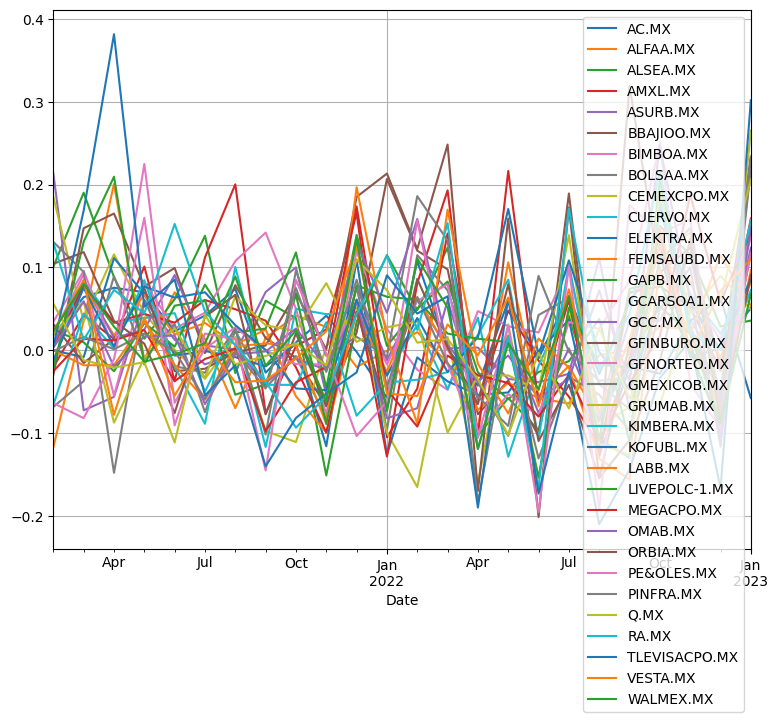

In [288]:
data = yf.download(tickers = tickers, start= '2021-01-01', end='2023-02-01', interval = "1mo")
data = data['Adj Close']
ret1 = data.pct_change().dropna()
ret1.plot(figsize=(9,7),grid=True);

Now expected return, volatility, covariance matrix and correlation matrix

In [289]:
tabla1 = pd.DataFrame(data={'Media1':ret1.mean(),
                            'Volatilidad1':ret1.std()
                            }, index=ret1.columns)

cov1 = ret1.cov()
corr1 = ret1.corr()

Risk free rate

In [290]:
rf1 = 0.11 / 12

Now we get the portfolio of minimun variance, the portfolio of minumun variance is the one that gets the highier returns with the lowest risk

In [291]:
# Construcción de parámetros
S1 = np.diag(tabla1.iloc[:,1])
Sigma1 = S1.dot(corr1).dot(S1)

Eind1 = tabla1.iloc[:,0]

# Función objetivo
def varianza(w, Sigma1):
    return w.T.dot(Sigma1).dot(w)

# Dato inicial
n1 = len(Eind1)
w01 = np.ones(n1) / n1
# Cotas de las variables
bnds1 = ((0, 1),) * n1
# Restricciones
cons1 = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

# Portafolio de mínima varianza
minimavar1 = minimize(fun=varianza,
                   x0=w01,
                   args=(Sigma1,),
                   bounds=bnds1,
                   constraints=cons1
                  )
minimavar1

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0008745170939766303
       x: [ 1.921e-01  1.396e-01 ...  5.982e-05  2.223e-18]
     nit: 24
     jac: [ 1.458e-03  1.955e-03 ...  2.050e-03  2.595e-03]
    nfev: 816
    njev: 24

In [292]:
# Pesos, rendimiento, riesgo y Radio de Sharpe del portafolio de mínima varianza

w_minvar1 = minimavar1.x
E_minvar1 = Eind1.T.dot(w_minvar1)
s_minvar1 = varianza(w_minvar1, Sigma1)**0.5
RS_minvar1 = (E_minvar1 - rf1) / s_minvar1
w_minvar1, E_minvar1, s_minvar1, RS_minvar1

(array([1.92149773e-01, 1.39582669e-01, 0.00000000e+00, 3.79470760e-18,
        1.08407583e-01, 2.11419424e-18, 5.81706384e-02, 0.00000000e+00,
        9.86623977e-18, 0.00000000e+00, 1.25357037e-01, 0.00000000e+00,
        4.11996826e-18, 0.00000000e+00, 0.00000000e+00, 2.71050543e-18,
        0.00000000e+00, 3.57786717e-18, 1.67547784e-02, 3.23512378e-02,
        1.17166169e-01, 0.00000000e+00, 3.36102673e-18, 0.00000000e+00,
        0.00000000e+00, 5.47522097e-18, 1.40946282e-18, 2.54787511e-18,
        2.10000297e-01, 1.84314369e-18, 0.00000000e+00, 5.98169744e-05,
        2.22261445e-18]),
 0.015071947837186246,
 0.029572235187361646,
 0.19969005160094672)

Lets create the dataframes that we will use to finish the final table of the active investment

In [293]:
data = data.transpose()
data.insert(0, 'Peso (%)', w_minvar1)
df_activa = pd.DataFrame (dates, columns = ['timestamp'])
ret1=ret1.transpose()
ret1.insert(0, 'Peso (%)', w_minvar1)
df = pd.DataFrame(ret1)


Because there are so meny stock that do not represent a big weight in our portfolio, it is better to just omit them


In [294]:
# Define the condition to filter the rows
condition = df['Peso (%)'] > 0.001

# Filter the DataFrame based on the condition
filtered_ret1 = df[condition]

# Create a list of values to filter by
values_to_filter = filtered_ret1.index.values

filtered_data = data[data.index.isin(values_to_filter)]
filtered_data

Date,Peso (%),2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
AC.MX,0.192150,84.994209,86.546684,92.099129,99.048798,105.987480,108.406509,112.944542,121.298645,118.026390,...,123.938515,131.361862,130.095276,138.647202,134.660873,142.378235,158.922424,157.685303,158.039993,166.100006
ALFAA.MX,0.139583,12.846219,11.342515,11.750805,14.110925,13.945353,14.922925,15.122429,14.065057,14.274536,...,13.670000,15.120000,14.280000,14.010000,12.820000,12.800000,13.160000,13.500000,12.430000,13.630000
ASURB.MX,0.108408,301.710938,366.163483,339.596680,320.494720,339.830536,344.143005,338.268341,337.164520,360.868805,...,425.827881,411.084473,395.230011,384.000000,426.709991,396.000000,464.970001,478.500000,454.010010,510.230011
BIMBOA.MX,0.058171,36.873363,37.620014,41.066132,38.807011,41.975513,43.077446,45.030609,49.879150,56.965485,...,61.735508,63.521816,64.881554,71.501709,65.725197,70.241196,76.236069,81.258263,82.300003,93.489998
ELEKTRA.MX,0.125357,1374.923828,1374.755127,1363.287598,1514.968140,1618.280273,1607.847534,1606.473755,1593.084473,1562.064941,...,1218.132690,1156.043945,1154.998657,1197.390015,1044.520020,1023.960022,995.000000,1030.260010,1095.290039,1032.099976
GRUMAB.MX,0.016755,213.853012,217.964340,230.744736,210.575241,208.672256,214.219803,207.076248,220.526901,227.189697,...,235.506363,228.361252,217.317184,247.529694,219.529999,191.779999,228.649994,238.860001,260.320007,273.109985
KIMBERA.MX,0.032351,32.110897,29.994678,31.321795,31.384562,34.040127,33.379517,30.416225,33.473896,32.077183,...,26.886696,29.177837,26.075239,28.746923,26.538698,26.023289,30.360502,32.425789,33.070000,35.849998
KOFUBL.MX,0.117166,74.030533,73.089752,78.601257,78.950912,85.031578,90.433418,96.761253,99.693680,99.736557,...,95.675171,111.991158,111.339996,123.419998,123.180000,117.360001,124.620003,131.860001,131.889999,143.270004
Q.MX,0.210000,97.574577,103.072884,101.831909,99.694176,98.263000,87.319756,91.060280,89.518959,88.898666,...,103.381470,92.808365,92.519997,86.019997,88.260002,83.169998,77.750000,81.230003,86.220001,104.019997


So we will work with:
- Arca Continental
- Alfa
- Grupo Aeropuertuario del Sureste
- Bimbo
- Elektra
- Gruma
- Kimberly-Clark
- Coca-Cola FEMSA
- Qualitas

 I will invest $900,000 at the begining so then we can save some cash to do the portfolio ajustements month by month

In [295]:
filtered_data.insert(1, 'Value', filtered_data['Peso (%)']*900000)
filtered_data.insert(2, 'Stocks', filtered_data['Value']/filtered_data.iloc[:,3])
stocks = filtered_data.iloc[:, [1, 2]]

Lets fill the first line of our portfolio (wich is the very first moth of the project)

In [296]:
df_activa.insert(1, 'capital',  filtered_data['Value'].sum())
df_activa.insert(2, 'rendimiento', 0)
df_activa.insert(3, 'rendimeinto acumulado', 0)
df_activa.insert(4, 'titulos totales', filtered_data['Stocks'].sum())
df_activa.insert(5, 'titulos_c_v', 0)
df_activa.insert(6, 'comision', filtered_data['Value'].sum()*0.004) #es la comision que cobra Kuspit
df_activa.insert(7, 'comision acumulada', filtered_data['Value'].sum()*0.04)
df_activa[:1]

,timestamp,capital,rendimiento,rendimeinto acumulado,titulos totales,titulos_c_v,comision,comision acumulada
0,2021-01-01,899946.164723,0,0,19130.154966,0,3599.784659,35997.846589


This is the loop that i created to make the necesary ajustment every month. I love it!

In [297]:
for j in range(0,24):  
    for i in range(0,9):
        filtered_data.iloc[i,1] = filtered_data.iloc[i,1]*(1+filtered_ret1.iloc[i,j+1]) #Para actualizar cuanto vale la inversion del portafolio en base a moviemientos del mercado
        # Hasta esto momento solo se ve reflajado en filtered_data el rendimiento de mercado, falta sumarle lo que compre o vendi de acciones por que los cambios en el precio (rebalanceo)

        #Para los balanceos de acciones (Aqui cambiamos la ponderacion de cada activo en el portafolio)
        if filtered_ret1.iloc[i,j+1] < -0.05:  #Row,Column
            filtered_data.iloc[i,0]= filtered_data.iloc[i,0]-0.025

        elif filtered_ret1.iloc[i,j+1] > 0.05:  
            filtered_data.iloc[i,0]= filtered_data.iloc[i,0]+0.025
        else:
            filtered_data.iloc[i,0]= filtered_data.iloc[i,0]

        #Para las compras de acciones y con ello cabiar el valor de mi portafolio
        if filtered_ret1.iloc[i,j+1] < -0.05:  #Row,Column
            filtered_data.iloc[i,1] = filtered_data.iloc[i,1]*(1-0.025)

        elif filtered_ret1.iloc[i,j+1] > 0.05:  
            filtered_data.iloc[i,1] = filtered_data.iloc[i,1]*(1+0.025)
        else:
            filtered_data.iloc[i,1] = filtered_data.iloc[i,1]*(1-0.025)

        
        
        filtered_data.iloc[i,2] = filtered_data.iloc[i,1]/filtered_data.iloc[i,j+3] #Para numero de stocks 


    #Aqui vamos a poner todos los cambios de las variables que se hacen mes a mes por el rebalanceo    
    df_activa.iloc[j+1,1]=filtered_data.Value.sum()
    df_activa.iloc[j+1,2]=(filtered_ret1.iloc[:,j+1]*filtered_ret1.iloc[:,j]).sum()
    df_activa.iloc[j+1,3]=((1+df_activa.iloc[j+1,2])*(1+1+df_activa.iloc[j,2]))-1
    df_activa.iloc[j+1,4]=filtered_data.Stocks.sum()
    df_activa.iloc[j+1,5]=df_activa.iloc[j+1,4]-df_activa.iloc[j,4]
    if  df_activa.iloc[j+1,5]>0:
         df_activa.iloc[j+1,6]=df_activa.iloc[j+1,5]*0.004 #La comison que cobra kuspit
    else:
        df_activa.iloc[j+1,6]=df_activa.iloc[j+1,5]*0.004*-1
    df_activa.iloc[j+1,7]=df_activa.iloc[j,7]+df_activa.iloc[j+1,6]
    
df_activa = df_activa.drop(df_activa.index[-1])

C:\Users\blas_\AppData\Local\Temp\ipykernel_4268\1905681810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.iloc[i,1] = filtered_data.iloc[i,1]*(1+filtered_ret1.iloc[i,j+1]) #Para actualizar cuanto vale la inversion del portafolio en base a moviemientos del mercado
C:\Users\blas_\AppData\Local\Temp\ipykernel_4268\1905681810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.iloc[i,0]= filtered_data.iloc[i,0]
C:\Users\blas_\AppData\Local\Temp\ipykernel_4268\1905681810.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

Finally, we print the table of the investment value, ajustments, comisions and returns

In [298]:
df_activa

,timestamp,capital,rendimiento,rendimeinto acumulado,titulos totales,titulos_c_v,comision,comision acumulada
0,2021-01-01,8.999462e+05,0.000000,0.000000,19130.154966,0.000000,3599.784659,35997.846589
1,2021-02-01,9.109238e+05,0.020027,1.040053,16697.516181,-2432.638785,9.730555,36007.577144
2,2021-03-01,9.231471e+05,-0.020110,0.979403,18138.756535,1441.240354,5.764961,36013.342105
3,2021-04-01,9.552855e+05,0.005736,0.991246,19524.206435,1385.449900,5.541800,36018.883905
4,2021-05-01,1.002980e+06,0.004235,1.014231,17777.923277,-1746.283158,6.985133,36025.869038
5,2021-06-01,9.948780e+05,0.007855,1.019978,18173.735972,395.812695,1.583251,36027.452288
6,2021-07-01,1.001510e+06,0.003383,1.014647,17544.662617,-629.073355,2.516293,36029.968582
7,2021-08-01,1.011140e+06,-0.002589,0.998197,16730.797435,-813.865183,3.255461,36033.224043
8,2021-09-01,1.002884e+06,0.010091,1.017568,16873.701076,142.903641,0.571615,36033.795657
9,2021-10-01,1.000903e+06,0.016719,1.043697,16616.669978,-257.031098,1.028124,36034.823782


In [299]:
df_medias = pd.DataFrame({
    'medida': ['rend_m', 'rend_c', 'sharpe'],
    'descripcion': ['Rendimiento Promedio Mensual', 'Rendimiento mensual acumulado', 'Sharpe Ratio'],
    'Inv_activa': [df_activa['rendimiento'].mean(),(df_activa.iloc[24,3]-1),(df_activa['rendimiento'].mean()-s_minvar1.mean())/rf1],
    'Inv_pasiva': [df_pasiva['rendimiento'].mean(),(df_pasiva.iloc[22,3]-1),(df_pasiva['rendimiento'].mean()-Sigma1.mean())/rf1]})

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

At the end, the results may be unexpected for most of the people, the pasive portfolio showed to perform much better than the active portfolio

In [300]:
df_medias

,medida,descripcion,Inv_activa,Inv_pasiva
0,rend_m,Rendimiento Promedio Mensual,-0.002094,0.033858
1,rend_c,Rendimiento mensual acumulado,0.013702,0.137175
2,sharpe,Sharpe Ratio,-3.454523,3.417448


As we can see the *Pasive Portafolio* was better in the long term, with an acumulated return of 13% compared to the *Active Portafolio* with acumulated return of just 1.3%, it does make sense, because many professional investors such as Warren Buffet Say that beating the market is not an easy job, and that most of the times is so much better to use pasive investment, in that way your don´t have to worry abour ajustments of the porfolio all the times and also, you don´t have to pay commisions to the brokes everytime you do any ajustment

<hr style="border:0.02in solid gray"> </hr>

It may be better to show some graphs, so we can have a better understanding of how better the pasive porfolio is compared to active portfolio

## <font color= #6B6B6B> 5.1 Results of first processes </font>

<br> As we can see in the plot, the invetment not only 

plt.plot(df_pasiva[''], 'o-r')
plt.ylabel('Investment $(in millions of pesos)')
plt.xlabel('Month')
plt.show()
plt.show()

## <font color= #6B6B6B> 5.2 Results of another proces </font>

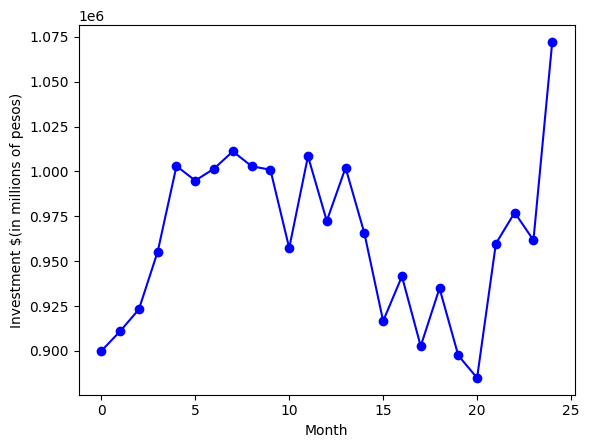

In [306]:
plt.plot(df_activa['capital'], 'o-b')
plt.ylabel('Investment $(in millions of pesos)')
plt.xlabel('Month')
plt.show()
plt.show()

## <font color= #6B6B6B> 5.3 Plots together </font>

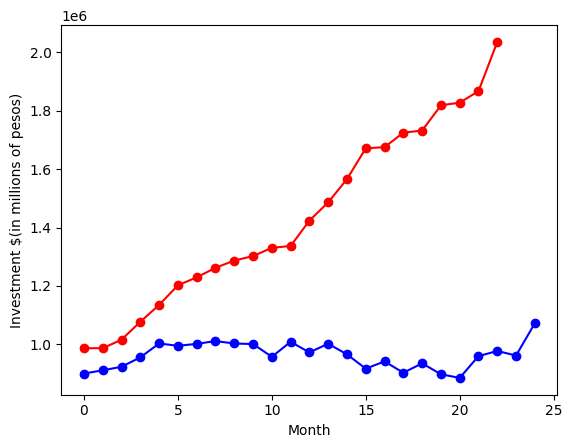

In [303]:
plt.plot(df_activa['capital'], 'o-b')
plt.plot(df_pasiva['capital'], 'o-r')
plt.ylabel('Investment $(in millions of pesos)')
plt.xlabel('Month')
plt.show()
plt.show()

# <font color= #6B6B6B> <font size = 6> 6. Conclusion </font>

# <font color= #6B6B6B> <font size = 6> 7. References </font>

<hr style="border:0.02in solid gray"> </hr>

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

[2] Nordqvist 2022. Active portfolio strategy. https://marketbusinessnews.com/financial-glossary/active-portfolio-strategy/. (2023)

[3] LIOUDIS 2021. Passive vs. Active Portfolio Management: What's the Difference? https://www.investopedia.com/ask/answers/040315/what-difference-between-passive-and-active-portfolio-management.asp. (2023)

[4] N.A. 2023. Markowitz model. https://en.wikipedia.org/wiki/Markowitz_model (2023)